## Installing Required Libraries

**Note**: The version of tensorflow might change on what `operating system` you are on and what version of `python` you are using. It is highly suggested to visit [tensorflow's](https://www.tensorflow.org/install) official wesbite for installation of the correct version.

In [1]:
!pip install tensorflow==2.16.1
!pip install opencv-python
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 846.8 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 4.8 MB/s eta 0:00:0000:0100:03m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.3 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 10.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.0/312.0 kB 8.6 MB/s eta 0:00:00:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installati

## Importing Necessary libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

2024-06-24 01:23:25.145528: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-24 01:23:25.242228: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-24 01:23:26.226262: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/tmp/ipykernel_22124/3528461870.py:8: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


## Check for any GPUs
If there are any `GPUs` available, then limit the `VRAM` consumption to avoid any **Out of Memory** errors. 

In [3]:
print(tf.config.list_physical_devices('GPU'))
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu,True)

[]


2024-06-24 01:23:28.436058: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


## Data Cleanup
We ideally want all the images in our dataset to consist of valid image formats (like `jpg`, `png`, `jpeg`, etc). So, we filter our dataset. 

In [4]:
image_extensions = ['jpeg', 'jpg', 'png', 'bmp']
data_directory = 'Data'

In [5]:
for image_category in os.listdir(data_directory):
    for img in os.listdir(os.path.join(data_directory,image_category)):
        img_path = os.path.join(data_directory,image_category,img)
        try:
            image = cv2.imread(img_path)
            extension = imghdr.what(img_path)
            if extension not in image_extensions:
                os.remove(img_path)
        except:
            print(f"Issue with image {img_path}")         
print("Data Cleanup done")

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Data Cleanup done


## Loading and Scaling the Datasets

In [6]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 944 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

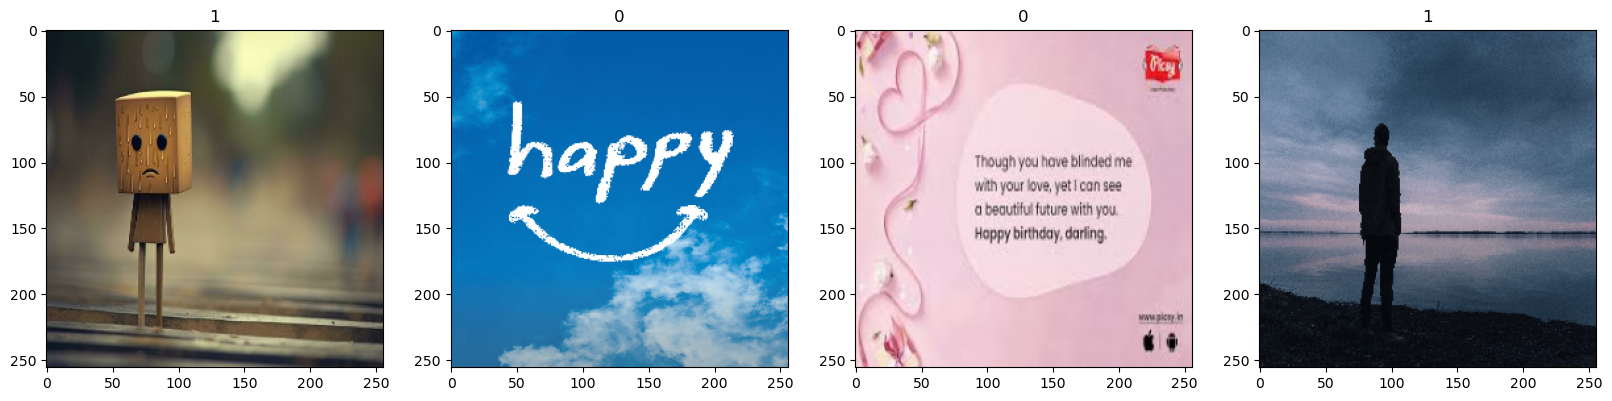

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [10]:
# Scaling down the rgb values
data = data.map(lambda x,y: (x/255, y))

In [11]:
data.as_numpy_iterator().next()

(array([[[[0.9411765 , 0.74509805, 0.7019608 ],
          [0.9411765 , 0.74509805, 0.7019608 ],
          [0.9411765 , 0.74509805, 0.7019608 ],
          ...,
          [0.90588236, 0.69803923, 0.6431373 ],
          [0.90505517, 0.697212  , 0.64231   ],
          [0.9019608 , 0.69411767, 0.6392157 ]],
 
         [[0.9411765 , 0.74509805, 0.7019608 ],
          [0.9411765 , 0.74509805, 0.7019608 ],
          [0.9411765 , 0.74509805, 0.7019608 ],
          ...,
          [0.90588236, 0.69803923, 0.6431373 ],
          [0.90588236, 0.69803923, 0.6431373 ],
          [0.90588236, 0.69803923, 0.6431373 ]],
 
         [[0.9411765 , 0.74509805, 0.7019608 ],
          [0.9411765 , 0.74509805, 0.7019608 ],
          [0.9411765 , 0.74509805, 0.7019608 ],
          ...,
          [0.90588236, 0.69803923, 0.6431373 ],
          [0.9065949 , 0.6987517 , 0.64384973],
          [0.9092601 , 0.70141697, 0.646515  ]],
 
         ...,
 
         [[0.8935738 , 0.68289673, 0.63638175],
          [0.89411

## Splitting Data

In [12]:
train_size = int(len(data) * 0.7)
validation_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

print(len(data))
print(train_size)
print(validation_size)
print(test_size)

30
21
6
3


In [13]:
# splitting the dataset into train, validation and test
train = data.take(train_size)
validation = data.skip(train_size).take(validation_size)
test = data.skip(train_size + validation_size).take(test_size)

## Building the Model

In [14]:
model = Sequential()

# Adding layers to the model
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())


model.add(Dense(256, activation='relu'))

model.add(Dense(1,activation='sigmoid'))

/home/harsha26/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [17]:
log_directory = 'logs'

In [18]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_directory)

In [19]:
history = model.fit(train,epochs=20,validation_data=validation, callbacks=[tensorboard_callback])

Epoch 1/20


2024-06-24 01:23:37.522849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/21 ━━━━━━━━━━━━━━━━━━━━ 4s 417ms/step - accuracy: 0.5181 - loss: 0.8945

2024-06-24 01:23:42.992839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.5542 - loss: 0.8214

2024-06-24 01:23:47.913961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:23:48.724611: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:23:49.202466: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 546ms/step - accuracy: 0.5562 - loss: 0.8167 - val_accuracy: 0.7240 - val_loss: 0.5346
Epoch 2/20


2024-06-24 01:23:50.341410: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/21 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7812 - loss: 0.5068

2024-06-24 01:23:51.185582: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.7348 - loss: 0.5544

2024-06-24 01:23:59.842724: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:24:00.157777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:24:00.881301: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 526ms/step - accuracy: 0.7352 - loss: 0.5536 - val_accuracy: 0.8073 - val_loss: 0.4251
Epoch 3/20


2024-06-24 01:24:02.170957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/21 ━━━━━━━━━━━━━━━━━━━━ 6s 447ms/step - accuracy: 0.8155 - loss: 0.4466

2024-06-24 01:24:05.197383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.8158 - loss: 0.4342

2024-06-24 01:24:11.542285: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:24:11.691748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:24:12.704213: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 532ms/step - accuracy: 0.8162 - loss: 0.4331 - val_accuracy: 0.9010 - val_loss: 0.2923
Epoch 4/20


2024-06-24 01:24:13.835550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:24:13.839412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.8590 - loss: 0.3274

2024-06-24 01:24:23.458363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:24:23.490663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:24:24.376300: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 531ms/step - accuracy: 0.8585 - loss: 0.3274 - val_accuracy: 0.8021 - val_loss: 0.4029
Epoch 5/20


2024-06-24 01:24:26.064309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/21 ━━━━━━━━━━━━━━━━━━━━ 7s 481ms/step - accuracy: 0.8849 - loss: 0.2874

2024-06-24 01:24:28.300207: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.8889 - loss: 0.2822

2024-06-24 01:24:35.328918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:24:35.350199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:24:36.280129: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 539ms/step - accuracy: 0.8888 - loss: 0.2820 - val_accuracy: 0.8854 - val_loss: 0.2675
Epoch 6/20
 1/21 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 1.0000 - loss: 0.2337

2024-06-24 01:24:38.038278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:24:38.224442: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.9135 - loss: 0.2259

2024-06-24 01:24:47.118526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:24:47.156051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:24:48.060439: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 539ms/step - accuracy: 0.9127 - loss: 0.2262 - val_accuracy: 0.8906 - val_loss: 0.2780
Epoch 7/20


2024-06-24 01:24:49.659069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/21 ━━━━━━━━━━━━━━━━━━━━ 6s 442ms/step - accuracy: 0.9472 - loss: 0.1843

2024-06-24 01:24:52.190579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.9323 - loss: 0.1751

2024-06-24 01:24:58.838729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:24:59.157238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:24:59.880799: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 543ms/step - accuracy: 0.9320 - loss: 0.1747 - val_accuracy: 0.9219 - val_loss: 0.1700
Epoch 8/20


2024-06-24 01:25:01.231491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:25:01.530310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.9749 - loss: 0.1155

2024-06-24 01:25:10.826221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:25:10.833471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:25:11.714792: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 540ms/step - accuracy: 0.9741 - loss: 0.1163 - val_accuracy: 0.8646 - val_loss: 0.3996
Epoch 9/20


2024-06-24 01:25:12.907092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:25:13.273645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.9606 - loss: 0.1133

2024-06-24 01:25:22.738830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:25:23.509489: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:25:23.662150: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 537ms/step - accuracy: 0.9605 - loss: 0.1133 - val_accuracy: 0.9271 - val_loss: 0.1869
Epoch 10/20


2024-06-24 01:25:24.999110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:25:25.173945: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.9548 - loss: 0.0960

2024-06-24 01:25:34.526417: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:25:35.398267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:25:35.462488: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 556ms/step - accuracy: 0.9550 - loss: 0.0958 - val_accuracy: 0.9531 - val_loss: 0.1530
Epoch 11/20


2024-06-24 01:25:37.043971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:25:37.061346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.9724 - loss: 0.1068

2024-06-24 01:25:46.828882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:25:47.195762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:25:47.695269: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 526ms/step - accuracy: 0.9718 - loss: 0.1069 - val_accuracy: 0.9219 - val_loss: 0.2086
Epoch 12/20


2024-06-24 01:25:48.776595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:25:48.860677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.9788 - loss: 0.0753

2024-06-24 01:25:58.307425: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:25:58.660550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:25:59.428435: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 538ms/step - accuracy: 0.9786 - loss: 0.0757 - val_accuracy: 0.9375 - val_loss: 0.2168
Epoch 13/20


2024-06-24 01:26:00.582168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/21 ━━━━━━━━━━━━━━━━━━━━ 9s 492ms/step - accuracy: 0.9531 - loss: 0.0776

2024-06-24 01:26:01.882571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.9820 - loss: 0.0594

2024-06-24 01:26:10.259061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:26:10.947060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:26:11.236625: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 535ms/step - accuracy: 0.9822 - loss: 0.0596 - val_accuracy: 0.9531 - val_loss: 0.1826
Epoch 14/20


2024-06-24 01:26:12.275422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:26:12.767429: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.9861 - loss: 0.0371

2024-06-24 01:26:22.028535: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:26:22.327651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:26:23.109586: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 532ms/step - accuracy: 0.9855 - loss: 0.0378 - val_accuracy: 0.9115 - val_loss: 0.2423
Epoch 15/20


2024-06-24 01:26:24.252767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:26:24.488650: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.9953 - loss: 0.0386

2024-06-24 01:26:33.809924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:26:33.874036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:26:34.793006: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 511ms/step - accuracy: 0.9951 - loss: 0.0387 - val_accuracy: 0.9479 - val_loss: 0.1888
Epoch 16/20


2024-06-24 01:26:35.938320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:26:36.012158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.9850 - loss: 0.0351

2024-06-24 01:26:45.491600: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:26:46.426443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:26:46.534989: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 527ms/step - accuracy: 0.9852 - loss: 0.0347 - val_accuracy: 0.9583 - val_loss: 0.1887
Epoch 17/20


2024-06-24 01:26:48.061118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/21 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 1.0000 - loss: 0.0202

2024-06-24 01:26:48.463691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.9965 - loss: 0.0175

2024-06-24 01:26:57.260829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:26:57.344714: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:26:58.278959: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 535ms/step - accuracy: 0.9961 - loss: 0.0182 - val_accuracy: 0.9688 - val_loss: 0.1360
Epoch 18/20


2024-06-24 01:26:59.825732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/21 ━━━━━━━━━━━━━━━━━━━━ 4s 452ms/step - accuracy: 0.9995 - loss: 0.0066

2024-06-24 01:27:05.127921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.9984 - loss: 0.0091

2024-06-24 01:27:09.035566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:27:09.160142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:27:10.090398: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 545ms/step - accuracy: 0.9982 - loss: 0.0096 - val_accuracy: 0.9479 - val_loss: 0.2023
Epoch 19/20


2024-06-24 01:27:11.326737: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/21 ━━━━━━━━━━━━━━━━━━━━ 19s 961ms/step - accuracy: 1.0000 - loss: 0.0015

2024-06-24 01:27:11.932989: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.9978 - loss: 0.0186

2024-06-24 01:27:20.710413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:27:20.975046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:27:21.807312: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 532ms/step - accuracy: 0.9977 - loss: 0.0189 - val_accuracy: 0.9635 - val_loss: 0.1754
Epoch 20/20


2024-06-24 01:27:22.832926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:27:22.886765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.9999 - loss: 0.0065

2024-06-24 01:27:32.308354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:27:32.545739: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:27:33.313615: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 532ms/step - accuracy: 0.9999 - loss: 0.0067 - val_accuracy: 0.9635 - val_loss: 0.1365


## Performance Analysis and Evaluation

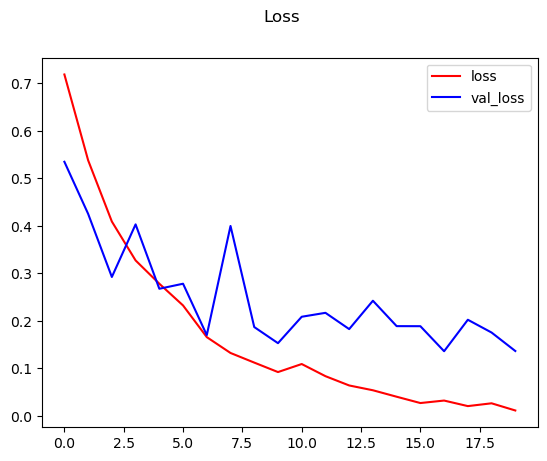

In [20]:
fig = plt.figure()
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss')
plt.legend(loc='upper right')
plt.show()

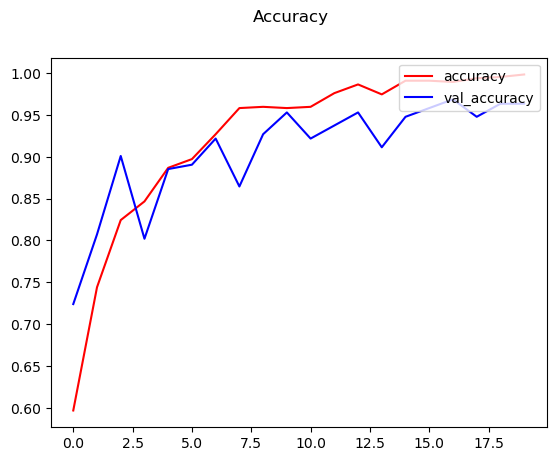

In [21]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='red', label='accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='val_accuracy')
fig.suptitle('Accuracy')
plt.legend(loc='upper right')
plt.show()

In [22]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [23]:
for batch in test.as_numpy_iterator():
    x, y = batch
    y_pred = model.predict(x)
    precision.update_state(y,y_pred)
    recall.update_state(y,y_pred)
    accuracy.update_state(y,y_pred)

2024-06-24 01:27:35.081662: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:27:35.317445: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-06-24 01:27:36.330851: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


2024-06-24 01:27:37.315000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [24]:
print(f"Precision: {precision.result()}, Accuracy: {accuracy.result()}, Recall: {recall.result()}")

Precision: 0.9411764740943909, Accuracy: 0.9375, Recall: 0.9599999785423279


## Testing

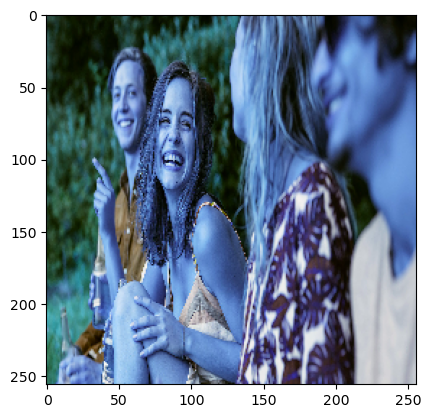

In [25]:
test_image = 'Data/happy/friends-happy-190821.jpg'
img = cv2.imread(test_image)
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))

In [26]:
y_pred = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [29]:
if y_pred > 0.5:
    print("Predicted category is Sad")
else:
    print("Predicted category is Happy")

Predicted category is Happy


## Saving the Model

In [30]:
model.save(os.path.join('model','imageClassifier.h5'))